In [1]:
#Loading the requiered dependencies

%matplotlib inline
%precision %.6f
%pylab inline

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import datetime, time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt

plt.style.use('seaborn')
#print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib


# Exploratory data analysis for  2nd Capstone project:
# "Cryptocurrency (Bitcoin) stock market prices prediction"

The purpose of this exploratory data analysis is to identify possible trends in the historical bitcoin market data, that could be of use in predicting future market closing prices.

In [2]:
#Link to dataset
html_bitcoin = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20180216"
#Load the data into a dataframe
bitcoin = pd.read_html(html_bitcoin + time.strftime("%Y%m%d"))[0]
#Formating the Date column into date-time
bitcoin = bitcoin.assign(Date=pd.to_datetime(bitcoin['Date']))
#Replace volume values of "-", and set the column to int64 type
bitcoin.loc[bitcoin['Volume']=="-",'Volume']=0
bitcoin['Volume'] = bitcoin['Volume'].astype('int64')
#set the index to be the Date column
bitcoin.set_index('Date', inplace = True)
#... and reverse the order of the dataframe
bitcoin = bitcoin.iloc[::-1]

bitcoin.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1500520000
2013-04-29,134.44,147.49,134.00,144.54,0,1491160000
2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
2013-05-02,116.38,125.60,92.28,105.21,0,1292190000


In [12]:
# First, we download daily market price data for multiple cryptocurrencies, which is loaded as a pandas dataframe (see below)
# The data is available from  April 28th, 2013 until February 16th, 2018.
html_bitcoin = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20180216"
html_ethereum = "https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20180216"
html_ripple = "https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20180216"
html_bitcoin_cash = "https://coinmarketcap.com/currencies/bitcoin-cash/historical-data/?start=20130428&end=20180216"
html_litecoin = "https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end=20180216"

bitcoin = pd.read_html(html_bitcoin + time.strftime("%Y%m%d"))[0]
ethereum = pd.read_html(html_ethereum + time.strftime("%Y%m%d"))[0]
ripple = pd.read_html(html_ripple + time.strftime("%Y%m%d"))[0]
bitcoin_cash = pd.read_html(html_bitcoin_cash + time.strftime("%Y%m%d"))[0]
litecoin = pd.read_html(html_litecoin + time.strftime("%Y%m%d"))[0]

# convert the date string to the correct date format
bitcoin = bitcoin.assign(Date=pd.to_datetime(bitcoin['Date']))
ethereum = ethereum.assign(Date=pd.to_datetime(ethereum['Date']))
ripple = ripple.assign(Date=pd.to_datetime(ripple['Date']))
bitcoin_cash = bitcoin_cash.assign(Date=pd.to_datetime(bitcoin_cash['Date']))
litecoin = litecoin.assign(Date=pd.to_datetime(litecoin['Date']))

# when Volume is equal to '-' convert it to 0
bitcoin.loc[bitcoin['Volume']=="-",'Volume']=0
#ethereum.loc[ethereum['Volume']=="-",'Volume']=0
ripple.loc[ripple['Volume']=="-",'Volume']=0
#bitcoin_cash.loc[bitcoin_cash['Volume']=="-",'Volume']=0
litecoin.loc[litecoin['Volume']=="-",'Volume']=0

# convert to int
bitcoin['Volume'] = bitcoin['Volume'].astype('int64')
ethereum['Volume'] = ethereum['Volume'].astype('int64')
ripple['Volume'] = ripple['Volume'].astype('int64')
bitcoin_cash['Volume'] = bitcoin_cash['Volume'].astype('int64')
litecoin['Volume'] = litecoin['Volume'].astype('int64')

#set index to be the Date column
bitcoin.set_index('Date', inplace = True)
ethereum.set_index('Date', inplace = True)
ripple.set_index('Date', inplace = True)
bitcoin_cash.set_index('Date', inplace = True)
litecoin.set_index('Date', inplace = True)

# ...  And here, we re-order invert the order of the data
bitcoin = bitcoin.iloc[::-1]
ethereum = ethereum.iloc[::-1]
ripple = ripple.iloc[::-1]
bitcoin_cash = bitcoin_cash.iloc[::-1]
litecoin = litecoin.iloc[::-1]


# Here we look at the first few rows bitcoin dataframe
bitcoin.head()


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1500520000
2013-04-29,134.44,147.49,134.00,144.54,0,1491160000
2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
2013-05-02,116.38,125.60,92.28,105.21,0,1292190000


A good way to plot this type of data is by using candlestickplots.
Each rectangle represents one day. Bottom border represents openin price. Upper border represents closing price
The upper and bottom sticks represent the lowest and highest price during that particular day
green color: closing price higher than open price
black color: closing price lower than open price

/Users/saverm/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


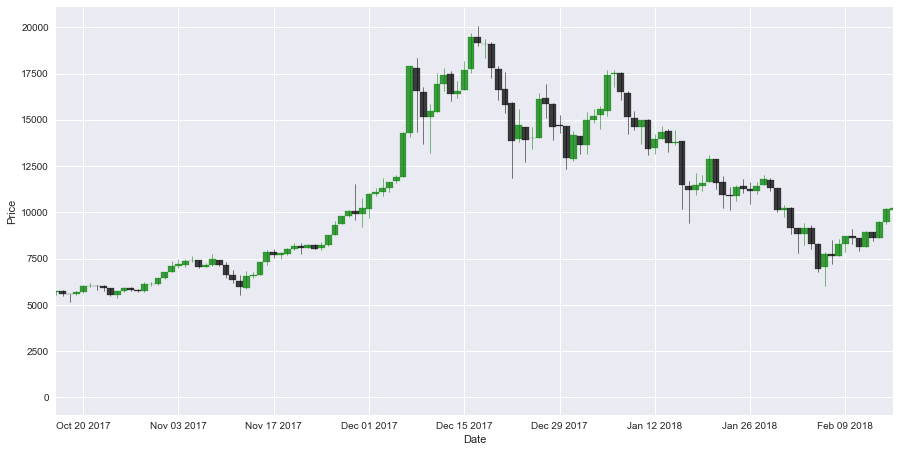

In [3]:
#The example below represents only the last 5 month of bitcoin's market data

#Reset the index to remove Date column from index
df_ohlc = bitcoin[['Open','High', 'Low', 'Close']].reset_index()

#Naming columns
df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Converting dates column to float values
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

#Making plot
fig, ax = plt.subplots(figsize = (15, 7.5))

#Converts raw mdate numbers to dates
ax.xaxis_date()
plt.xlabel("Date")

#Making candlestick plot
candlestick_ohlc(ax,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)
plt.ylabel("Price")
dstart = datetime.datetime(2017,10,16)
dend = datetime.datetime(2018,2,16)
plt.xlim(dstart,dend)
plt.legend()
plt.savefig('bitcoin_5month_candlestick.png', bbox_inches="tight")
plt.show()


We could also visualize the correlation between bitcoin's Open, High, Low and Close prices using a scatter_matrix

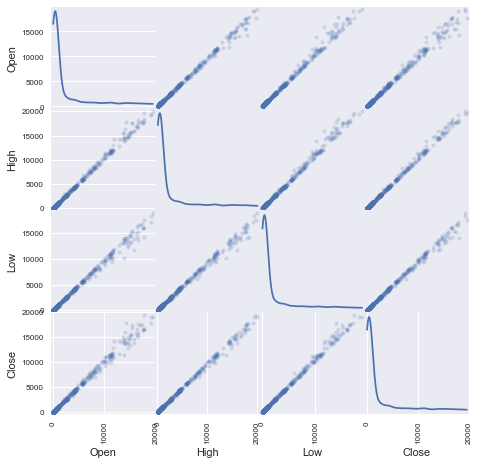

In [26]:
from pandas.tools.plotting import scatter_matrix
df = bitcoin[['Open','High','Low','Close']]
X = scatter_matrix(df, alpha=0.2, figsize=(7.5, 7.5), diagonal='kde')
plt.savefig('scatter_matrix.png', bbox_inches="tight")
plt.show()

As expected, the Open, High, Low and Close prices are highly correlated to one another. Thus, for predicting future trends in bitcoin's stock market we could simply use the Open price (plotted below). The redline represents a smoothed version of the data, calculated as a moving average with a window of 100 data points.


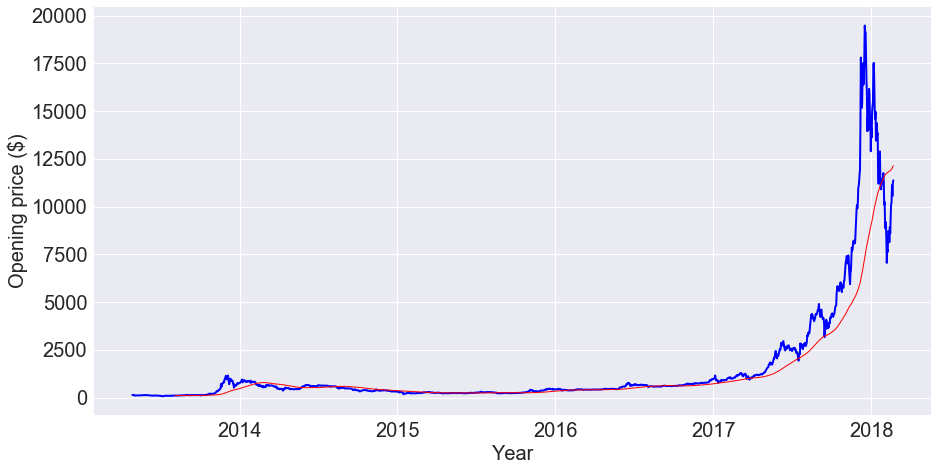

In [10]:
fig, ax = plt.subplots(figsize = (15, 7.5))
y = bitcoin.Open

period = 100
y100ma = pd.rolling_mean(bitcoin.Open,period)

plt.plot(y, color = 'b', linewidth = 2)
plt.plot(y100ma, color = 'r', linewidth = 1)

plt.xlabel('Year',fontsize=20)
plt.ylabel('Opening price ($)',fontsize=20)
ax.tick_params(labelsize=20)

plt.savefig('opening_price.png', bbox_inches="tight")
plt.show()

We could also ask if bitcoin's opening prices for are correlated with the opening prices of other cryptocurrencies.
Fort that, we can plot the normalized Opening prices for different cryptocurrencies.

In [27]:
from sklearn import preprocessing

open_prices = pd.concat([bitcoin['Open'],ethereum['Open'], ripple['Open'], bitcoin_cash['Open'], litecoin['Open']], axis=1, 
          keys=['bitcoin', 'ethereum','ripple','bitcoin_cash', 'litecoin']).fillna(0)

#To make the prices comparable, we normalize the data to fit a 0 to 1 scale
x = open_prices.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, index = bitcoin.index)
df.columns= ['bitcoin', 'ethereum','ripple','bitcoin_cash', 'litecoin']


In [28]:
#Normalized prices
df.head()

,bitcoin,ethereum,ripple,bitcoin_cash,litecoin
Date,,,,,
2013-04-28,0.003442,0,0,0,0.008799
2013-04-29,0.003398,0,0,0,0.008995
2013-04-30,0.003890,0,0,0,0.009079
2013-05-01,0.003633,0,0,0,0.008771
2013-05-02,0.002467,0,0,0,0.007347


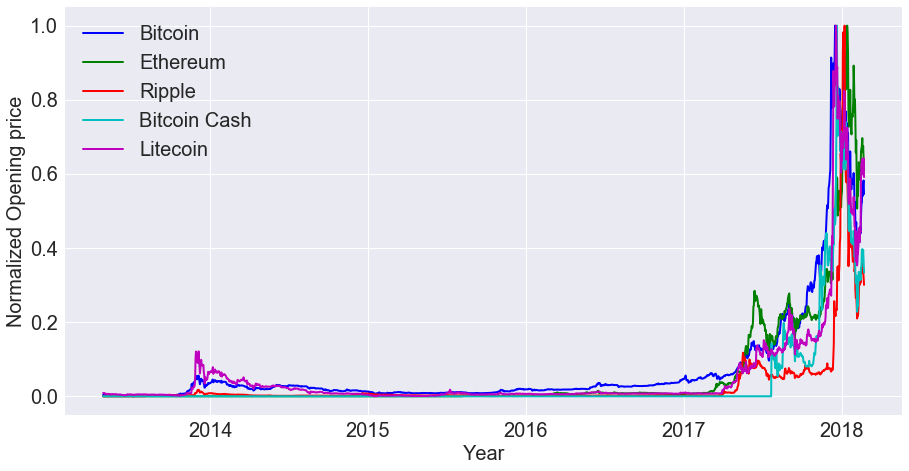

In [29]:
fig, ax = plt.subplots(figsize = (15, 7.5))
y = bitcoin.Open

l1 = plt.plot(df.bitcoin, color = 'b', linewidth = 2, label = 'Bitcoin')
l2 = plt.plot(df.ethereum, color = 'g', linewidth = 2, label = 'Ethereum')
l3 = plt.plot(df.ripple, color = 'r', linewidth = 2, label = 'Ripple')
l4 = plt.plot(df.bitcoin_cash, color = 'c', linewidth = 2, label = 'Bitcoin Cash')
l5 = plt.plot(df.litecoin, color = 'm', linewidth = 2, label = 'Litecoin')

plt.legend(loc = 'upper left', prop={'size': 20})

plt.xlabel('Year',fontsize=20)
plt.ylabel('Normalized Opening price',fontsize=20)
ax.tick_params(labelsize=20)

plt.savefig('opening_price_other_cryptocurrencies.png', bbox_inches="tight")
plt.show()

We can see that all of the cryptocurrencies listed show a similar pattern of growth, which is most evident from 2017 onward.
To get a better idea about the correlation of this patterns, we can plot a scatter matrix of the normalized open prices

In [17]:
c = df.corr()
c

,bitcoin,ethereum,ripple,bitcoin_cash,litecoin
bitcoin,1.000000,0.917312,0.817799,0.945870,0.955455
ethereum,0.917312,1.000000,0.885665,0.893533,0.923178
ripple,0.817799,0.885665,1.000000,0.854794,0.865852
bitcoin_cash,0.945870,0.893533,0.854794,1.000000,0.941806
litecoin,0.955455,0.923178,0.865852,0.941806,1.000000


Looking at the correlation matrix from above, we can confirm the high degree of correlation among the opening prices of the cryptocurrenices listed here.

Another way to look at the Open price data is to express it as the percentage of change over time, which we proceed to plot for Bitcoin.

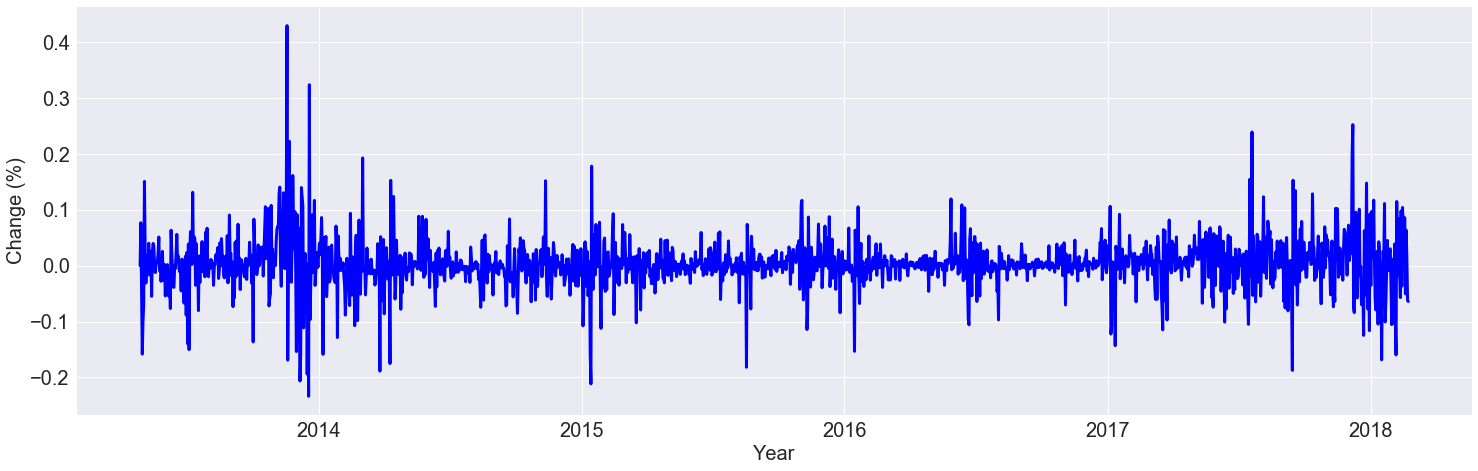

In [35]:
# Plotting percentage of change over time for Bitcoin Open price

fig, ax = plt.subplots(figsize = (25, 7.5))
x = bitcoin.index
y = bitcoin.Close.pct_change()
y[0] = 0


plt.plot(x, y, color = 'b', linewidth = 3)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Change (%)',fontsize=20)
#dstart = datetime.datetime(2013,4,28)
#dend = datetime.datetime(2014,4,28)

#plt.xlim(dstart, dend)
ax.tick_params(labelsize=20)

plt.savefig('bitcoin_change_percentage.png', bbox_inches="tight")
plt.show()

Although the percentage of change varies around 0, there are multiple "peaks", which may suggest that this time series is autocorrlated.

To test this, we can first look at the correlation between the data at times (t-1) and (t).

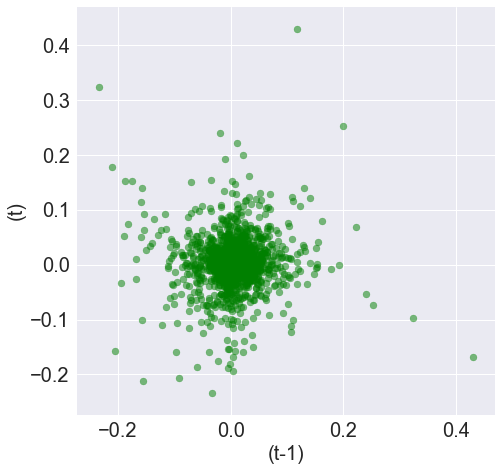

In [36]:
#Correlation at times (t-1) and (t)
t_minus_1 = y[0:len(y)-1].values
t_minus_1[0] = 0
t_1 = y[1:len(y)].values

fig, ax = plt.subplots(figsize = (7.5, 7.5))
plt.scatter(t_minus_1, t_1, c="g", alpha=0.5)
plt.xlabel('(t-1)',fontsize=20)
plt.ylabel('(t)',fontsize=20)
ax.tick_params(labelsize=20)

plt.savefig('bitcoin_change_percentage_autocorr.png', bbox_inches="tight")
plt.show()

In [37]:
r, p = pearsonr(t_minus_1, t_1)
print r

0.006055497317096419


The plot from above shows the lack of fcorrelation ofr a lag of 1. To get a more general idea of autocorrelation, we can use  pandas autocorrelation_plot function to calculate the autocorrelation for other lag values.

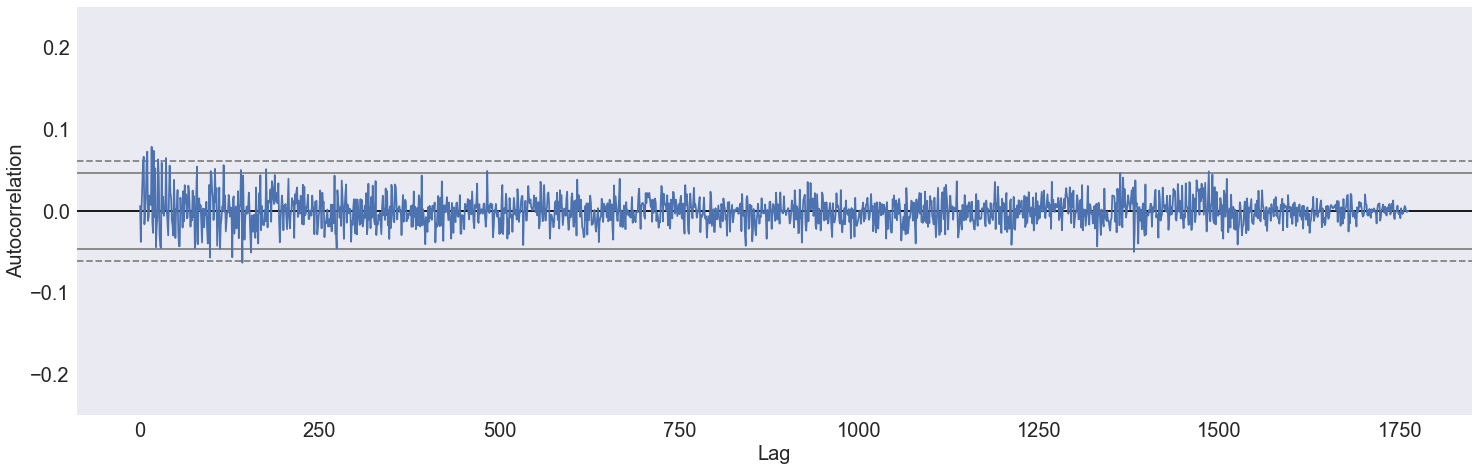

In [38]:
from pandas.tools.plotting import autocorrelation_plot
fig, ax = plt.subplots(figsize = (25, 7.5))
autocorrelation_plot(y, ax = ax)
plt.ylim(-0.25,0.25)
plt.xlabel('Lag', fontsize = 20)
plt.ylabel('Autocorrelation', fontsize = 20)
ax.tick_params(labelsize=20)
plt.savefig('bitcoin_change_percentage_autocorr_2.png', bbox_inches="tight")
plt.show()

In the previous graph, the dashed line correponds to the 99% confidence interval. Any values above that line, would point to those lag values for which the signal(percentage change over time) is autocorrelated. The plot from above shows that there is no autoccorelation for the percentage change over time series.

A third way to look at this data would to calculate the Volatility, which is the standar deviation of the change percentage over time. We can calculate with pandas using a rolling window of size 5.

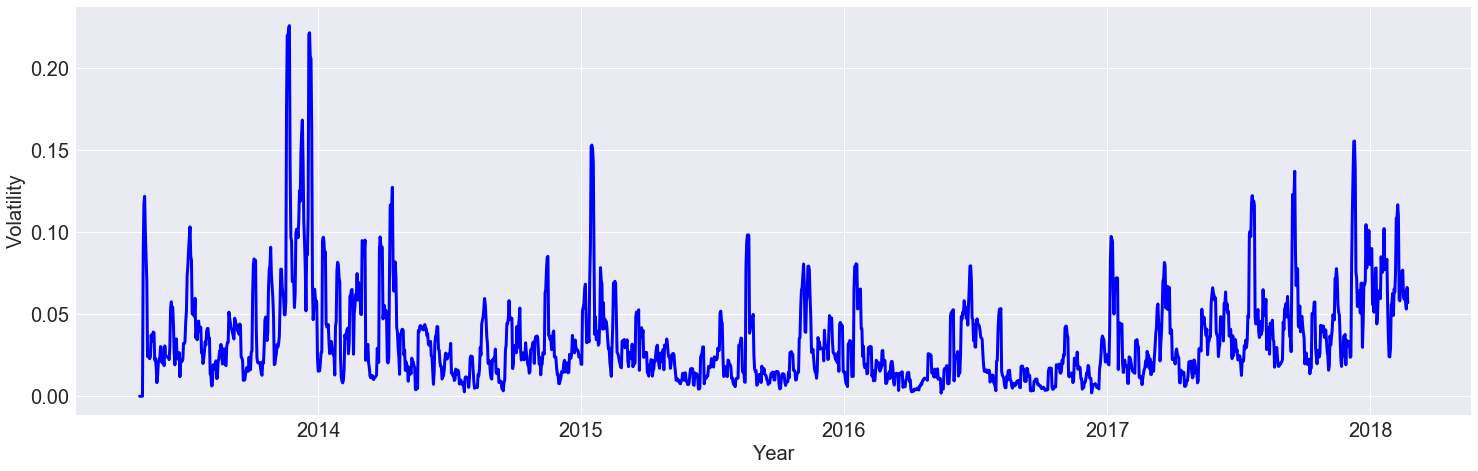

In [43]:
fig, ax = plt.subplots(figsize = (25, 7.5))
x = bitcoin.index

period = 5
vol = pd.rolling_std(y,period)
vol[0:period] = 0

plt.plot(x, vol, color = 'b', linewidth = 3)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Volatility',fontsize=20)
#dstart = datetime.datetime(2013,4,28)
#dend = datetime.datetime(2014,4,28)

#plt.xlim(dstart, dend)
ax.tick_params(labelsize=20)

plt.savefig('volatility.png', bbox_inches="tight")
plt.show()

At first glance, there seems to be a certain periodicity in the volatility, which suggests that this signal is autocorrelated.  Below, is the autocorrelation plot for this signal:

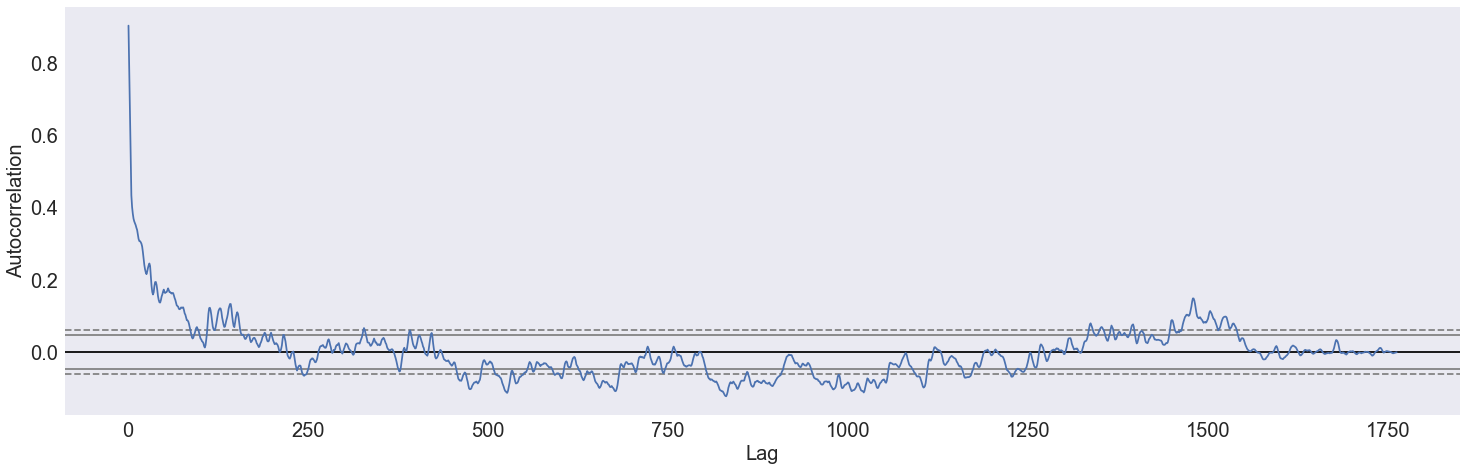

In [44]:
fig, ax = plt.subplots(figsize = (25, 7.5))
autocorrelation_plot(vol, ax = ax)
plt.xlabel('Lag', fontsize = 20)
plt.ylabel('Autocorrelation', fontsize = 20)
#plt.xlim(0,250)
ax.tick_params(labelsize=20)

plt.show()

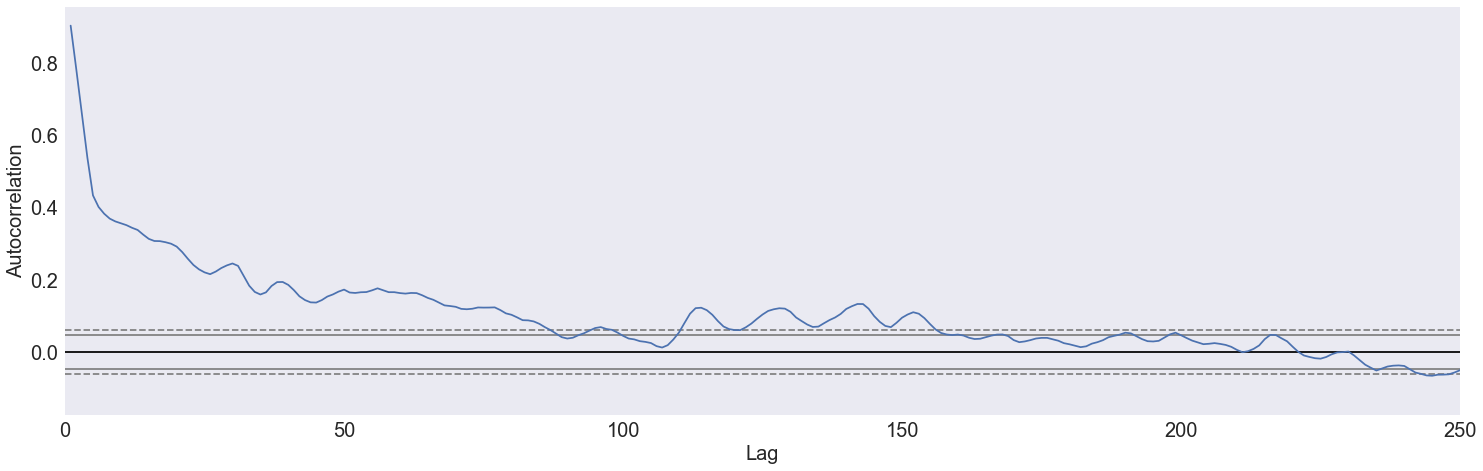

In [45]:
fig, ax = plt.subplots(figsize = (25, 7.5))
autocorrelation_plot(vol, ax = ax)
plt.xlabel('Lag', fontsize = 20)
plt.ylabel('Autocorrelation', fontsize = 20)
plt.xlim(0,250)
ax.tick_params(labelsize=20)

plt.savefig('volatility_autocorrelation.png', bbox_inches="tight")
plt.show()

As before,  the dashed line corresponds to the 99% confidence interval. Any values above that line, would point to those lag values for which the volatility is autocorrelated. The plot shows that for lag values lower than 80, there is a significant correlation. Thus, this shows that there are  periodc changes in the volatility of bitcoin's open prices.



After performing this EDA, it was determined that there are no patterns/periodicity in the percentage of change of bitcoin open prices, that could be used  to predict future variations of bitcoin’s stock market prices. On the other hand,  the Volatility was found to show autocorrelation, which shows the presence  of periodic changes. Predicting volatility might be useful to determine times when a sudden big change in bitcoin’s prices is expected. In future analysis one could also look at other types of data, such as people’s mood measured by sentiment analysis, to see how they could affect Bitcoin’s stock prices.